In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
from keras.layers import Dropout,normalization

Using TensorFlow backend.


In [2]:
# data_train = pd.read_csv(r'./datalab/231784/used_car_train_20200313.csv',sep = ' ')
# data_test = pd.read_csv(r'./datalab/231784/used_car_testA_20200313.csv',sep = ' ')
data_train = pd.read_csv('dataset/used_car_train_20200313.csv', sep=' ')
data_test = pd.read_csv('dataset/used_car_testB_20200421.csv', sep=' ')

In [3]:
data_train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

- 数据清洗

In [4]:
data_train.replace(to_replace = '-', value = np.nan, inplace = True)
data_test.replace(to_replace = '-', value = np.nan, inplace = True)

In [5]:
data_train.fillna(data_train.median(),inplace= True)
data_test.fillna(data_train.median(),inplace= True)

In [6]:
#特征标签
tags = ['model','brand','bodyType','fuelType','regionCode','seller','regDate','creatDate','kilometer','notRepairedDamage','power','v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']

In [7]:
#修改异常数据
data_train['power'][data_train['power']>600]=600
data_test['power'][data_test['power']>600]=600

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
data_train['used_time'] = (pd.to_datetime(data_train['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data_train['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [9]:
data_test['used_time'] = (pd.to_datetime(data_train['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data_train['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [10]:
# tags.append("used_time")

In [11]:
#特征归一化
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(data_train[tags].values)
x = min_max_scaler.transform(data_train[tags].values)
x_ = min_max_scaler.transform(data_test[tags].values)

In [12]:
#获得y值
y = data_train['price'].values

In [13]:
y.shape

(150000,)

In [14]:
# x = x.reshape(x.shape[0],x.shape[1],1)
# y = y.reshape(y.shape[0],-1,1)

In [15]:
#切分数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
Bathc_size = 2048

In [17]:
optim = keras.optimizers.Adam()

- 建模

In [68]:
model = keras.Sequential([
#         keras.layers.Dense(1024),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(300,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(1)])
model.compile(loss='mean_absolute_error',
                optimizer='Adam')

In [69]:
model.fit(x_train,y_train,batch_size = 2048,epochs=200)

Train on 120000 samples
Epoch 1/200
120000/120000 [==============================] - 1s 6us/sample - loss: 5299.1345
Epoch 2/200
120000/120000 [==============================] - 0s 3us/sample - loss: 3432.6845
Epoch 3/200
120000/120000 [==============================] - 0s 3us/sample - loss: 1221.7669
Epoch 4/200
120000/120000 [==============================] - 0s 3us/sample - loss: 1018.5412
Epoch 5/200
120000/120000 [==============================] - 0s 3us/sample - loss: 931.1155
Epoch 6/200
120000/120000 [==============================] - 0s 3us/sample - loss: 863.3029
Epoch 7/200
120000/120000 [==============================] - 0s 3us/sample - loss: 810.1035
Epoch 8/200
120000/120000 [==============================] - 0s 3us/sample - loss: 763.4543
Epoch 9/200
120000/120000 [==============================] - 0s 3us/sample - loss: 726.5500
Epoch 10/200
120000/120000 [==============================] - 0s 3us/sample - loss: 683.7367
Epoch 11/200
120000/120000 [=======================

120000/120000 [==============================] - 0s 3us/sample - loss: 467.5022
Epoch 89/200
120000/120000 [==============================] - 0s 3us/sample - loss: 470.2855
Epoch 90/200
120000/120000 [==============================] - 0s 3us/sample - loss: 504.8527
Epoch 91/200
120000/120000 [==============================] - 0s 3us/sample - loss: 463.5698
Epoch 92/200
120000/120000 [==============================] - 0s 3us/sample - loss: 466.5384
Epoch 93/200
120000/120000 [==============================] - 0s 3us/sample - loss: 469.8630
Epoch 94/200
120000/120000 [==============================] - 0s 3us/sample - loss: 462.2671
Epoch 95/200
120000/120000 [==============================] - 0s 3us/sample - loss: 470.6247
Epoch 96/200
120000/120000 [==============================] - 0s 3us/sample - loss: 465.6139
Epoch 97/200
120000/120000 [==============================] - 0s 3us/sample - loss: 466.5660
Epoch 98/200
120000/120000 [==============================] - 0s 3us/sample - loss:

120000/120000 [==============================] - 0s 3us/sample - loss: 445.6677
Epoch 176/200
120000/120000 [==============================] - 0s 3us/sample - loss: 442.8845
Epoch 177/200
120000/120000 [==============================] - 0s 3us/sample - loss: 436.9057
Epoch 178/200
120000/120000 [==============================] - 0s 3us/sample - loss: 442.1777
Epoch 179/200
120000/120000 [==============================] - 0s 3us/sample - loss: 436.8034
Epoch 180/200
120000/120000 [==============================] - 0s 3us/sample - loss: 444.3141
Epoch 181/200
120000/120000 [==============================] - 0s 3us/sample - loss: 440.2351
Epoch 182/200
120000/120000 [==============================] - 0s 3us/sample - loss: 439.7444
Epoch 183/200
120000/120000 [==============================] - 0s 3us/sample - loss: 461.7606
Epoch 184/200
120000/120000 [==============================] - 0s 3us/sample - loss: 457.4408
Epoch 185/200
120000/120000 [==============================] - 0s 3us/samp

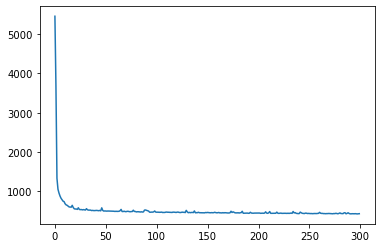

In [65]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])

In [70]:
#比较训练集和测试集效果
mean_absolute_error(y_train,model.predict(x_train))

424.5878193009774

In [77]:
erro = mean_absolute_error(y_test,model.predict(x_test))
erro 

459.20423568589933

In [78]:
model.save(str(int(erro))+".h5")

In [79]:
model.load_weights(str(int(erro))+".h5")

447 已提交

测试集比训练集mae还小，说明可以继续训练。但本页代码只起到抛砖引玉的作用。经过简单的调整隐藏层结构，比赛成绩可以达到450左右。笔者曾经过对原始数据进行过one-hot编码，效果反而更差了，内存吃不消。初步发现原始信息保留越完整，神经网络的效果越强，凡是造成信息丢失的处理，可能都会降低神经网络的效果。
我通过这个案例发现，利用神经网络进行回归分析确实比传统特征工程建模要无脑一些，将特征提取的过程也自动化了。虽然解释性变弱了，但如果以预测结果的准确率为首要目标的话，神经网络明显胜出。

#### 结果保存

In [80]:
#输出结果预测
y_=model.predict(x_)

In [81]:
data_test_price = pd.DataFrame(y_,columns = ['price'])
results = pd.concat([data_test['SaleID'],data_test_price],axis = 1)
results.to_csv('results_ne.csv',sep = ',',index = None)